### Logistic Regression Model

$$ \text{minimize} \left( -\frac{1}{N} \sum_{i=1}^N \left( y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}i) \right) + \frac{1}{2C} \sum{i} w_i^2 \right) $$

$$ \lambda = \frac{1}{C} $$

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

from src.paths import TRANSFORMED_DATA_DIR

In [2]:
# read in data
df = pd.read_parquet(TRANSFORMED_DATA_DIR / 'cleaned_sentiments.parquet')
df.head()

,recommended,cleaned
0,1,Very good flight following an equally good fli...
1,1,An hours delay due to late arrival of the inco...
2,0,I booked through BA because Loganair dont have...
3,0,British airways lost bags in LHR then found th...
4,0,The check in process and reward loyalty progra...


#### Split the Data

In [3]:
# split the data
X = df['cleaned']
y = df['recommended']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Tfidf Vectorizer

In [4]:
# tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# initialize count vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# fit transform the training data
X_train_vec = tfidf_vectorizer.fit_transform(X_train)

# transform the test data
X_test_vec = tfidf_vectorizer.transform(X_test)

In [5]:
# logistic regression
from sklearn.linear_model import LogisticRegression

# initialize the model
log_reg = LogisticRegression(max_iter=1000)

# fit the model
log_reg.fit(X_train_vec, y_train)

# predict
y_pred = log_reg.predict(X_test_vec)


In [6]:
# metrics
from sklearn.metrics import classification_report

# classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.96      0.92       503
           1       0.91      0.75      0.82       276

    accuracy                           0.89       779
   macro avg       0.89      0.86      0.87       779
weighted avg       0.89      0.89      0.88       779



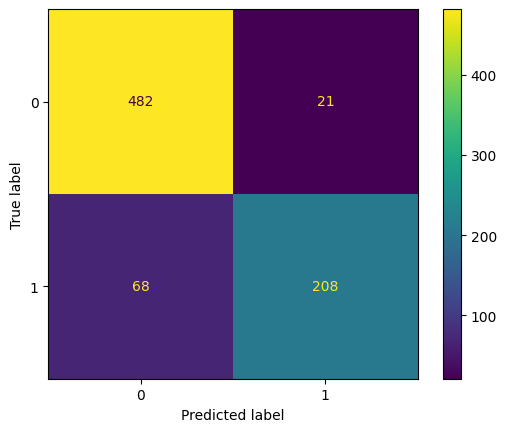

In [7]:
# display
ConfusionMatrixDisplay.from_estimator(log_reg, X_test_vec, y_test)